# SVM

In [ ]:
from sklearn.svm import LinearSVC, SVC
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


In [2]:
iris = load_iris(as_frame = True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 2)

In [3]:
svm = make_pipeline(StandardScaler(), LinearSVC(C = 1, random_state = 42))
svm.fit(X, y)

,steps,"[('standardscaler', ...), ('linearsvc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001


In [4]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

In [5]:
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

In [6]:
polynomialSVM = make_pipeline(PolynomialFeatures(degree=3), StandardScaler(), LinearSVC(C = 10, max_iter = 10_000, random_state=42))
polynomialSVM.fit(X, y)

,steps,"[('polynomialfeatures', ...), ('standardscaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,degree,3
,interaction_only,False
,include_bias,True
,order,'C'
,copy,True
,with_mean,True
,with_std,True


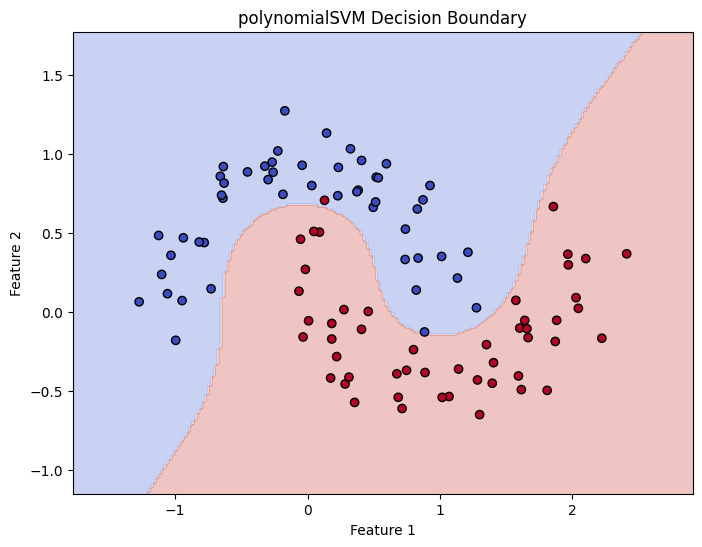

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Create a mesh to plot the decision boundary
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
Z = polynomialSVM.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title("polynomialSVM Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# BDSET

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles, make_moons
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [32]:
# Generate synthetic non-linear data (circles dataset)
X, y = make_circles(n_samples=200, factor=0.5, noise=0.1, random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

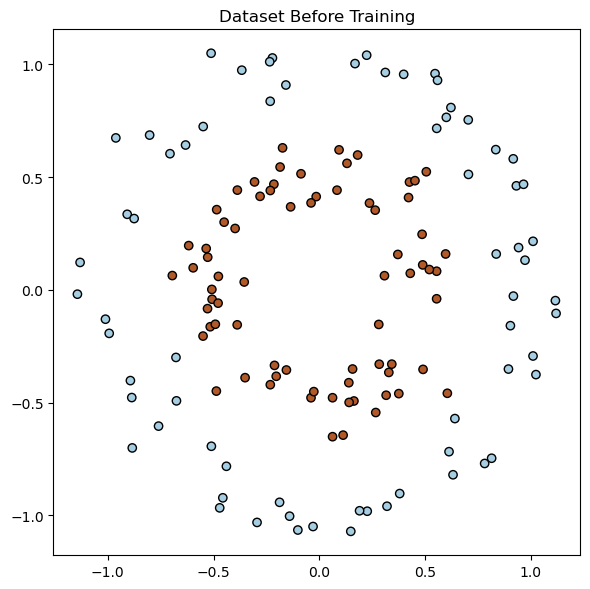

In [20]:
# Function to plot dataset
def plot_dataset(X, y, title, ax):
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k', marker='o')
    ax.set_title(title)
    return scatter

# Plot the dataset before training
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
plot_dataset(X_train, y_train, 'Dataset Before Training', ax)
plt.tight_layout()
plt.show()

In [21]:
# Initialize SVM models with different kernels
svm_linear = SVC(kernel='linear', C=1)
svm_poly = SVC(kernel='poly', degree=3, C=1)
svm_rbf = SVC(kernel='rbf', C=1)

# Fit the models
svm_linear.fit(X_train, y_train)
svm_poly.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)

SVC(C=1)

In [22]:
# Predictions
y_pred_linear = svm_linear.predict(X_test)
y_pred_poly = svm_poly.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)

In [24]:
# Accuracy
accuracy_linear = accuracy_score(y_test, y_pred_linear)
accuracy_poly = accuracy_score(y_test, y_pred_poly)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)


# Print accuracies
print(f"Accuracy (Linear Kernel): {accuracy_linear:.2f}")
print(f"Accuracy (Polynomial Kernel): {accuracy_poly:.2f}")
print(f"Accuracy (RBF Kernel): {accuracy_rbf:.2f}")

Accuracy (Linear Kernel): 0.47
Accuracy (Polynomial Kernel): 0.58
Accuracy (RBF Kernel): 0.98


In [25]:
# Confusion Matrix
cm_linear = confusion_matrix(y_test, y_pred_linear)
cm_poly = confusion_matrix(y_test, y_pred_poly)
cm_rbf = confusion_matrix(y_test, y_pred_rbf)

In [26]:
# Function to plot decision boundary and support vectors
def plot_decision_boundary(model, X, y, title, ax):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.8)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.Paired)
    
    # Plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], facecolors='none', edgecolors='r', s=100, label='Support Vectors')
    ax.set_title(title)
    return scatter

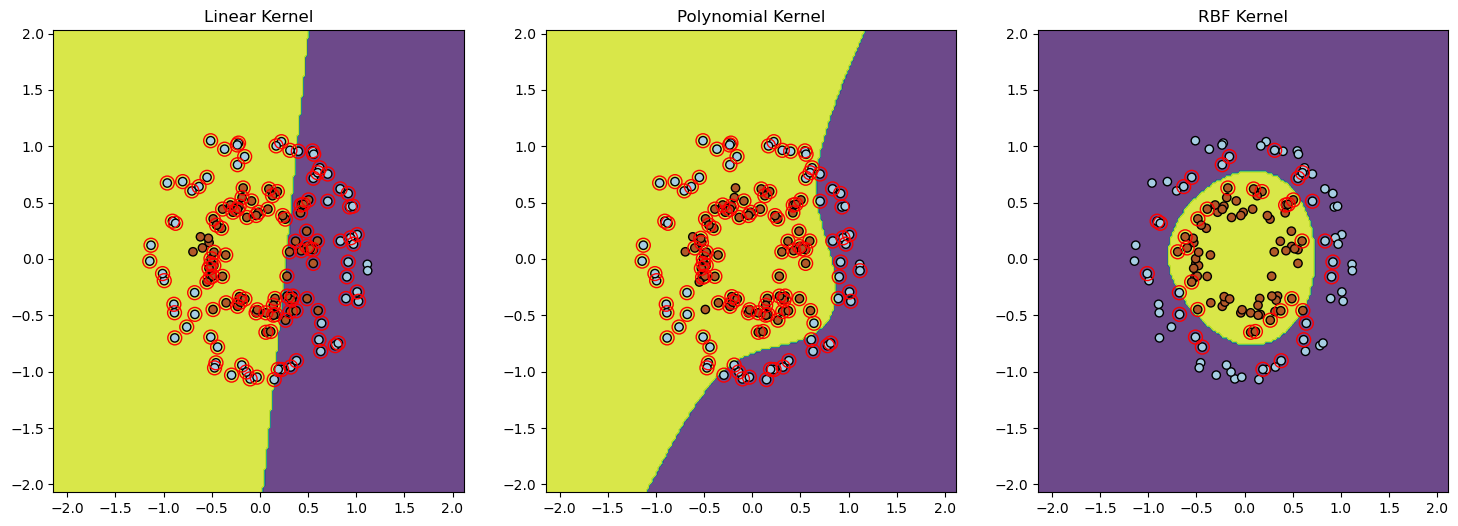

In [27]:
# Create subplots for decision boundaries and support vectors
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot decision boundaries and support vectors
plot_decision_boundary(svm_linear, X_train, y_train, "Linear Kernel", axes[0])
plot_decision_boundary(svm_poly, X_train, y_train, "Polynomial Kernel", axes[1])
plot_decision_boundary(svm_rbf, X_train, y_train, "RBF Kernel", axes[2])

# BDSET#2

Accuracy without regularization: 0.8767
Accuracy with L1 regularization: 0.8800
Accuracy with L2 regularization: 0.8767


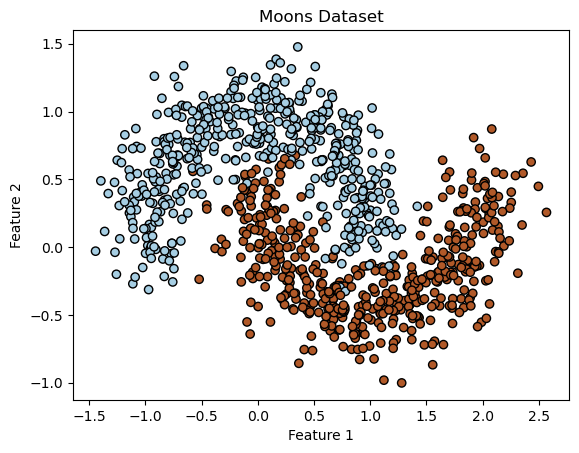

In [ ]:
# Step 1: Generate the dataset
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

# Step 2: Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 4: Train a Logistic Regression model without regularization
model_no_reg = LogisticRegression(penalty=None, solver='lbfgs', max_iter=1000)
model_no_reg.fit(X_train, y_train)

# Step 5: Evaluate accuracy without regularization
y_pred_no_reg = model_no_reg.predict(X_test)
accuracy_no_reg = accuracy_score(y_test, y_pred_no_reg)

# Step 6: Train a Logistic Regression model with L1 regularization
model_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
model_l1.fit(X_train, y_train)

# Step 7: Evaluate accuracy with L1 regularization
y_pred_l1 = model_l1.predict(X_test)
accuracy_l1 = accuracy_score(y_test, y_pred_l1)

# Step 8: Train a Logistic Regression model with L2 regularization
model_l2 = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000)
model_l2.fit(X_train, y_train)

# Step 9: Evaluate accuracy with L2 regularization
y_pred_l2 = model_l2.predict(X_test)
accuracy_l2 = accuracy_score(y_test, y_pred_l2)

# Step 10: Print the accuracies
print(f"Accuracy without regularization: {accuracy_no_reg:.4f}")
print(f"Accuracy with L1 regularization: {accuracy_l1:.4f}")
print(f"Accuracy with L2 regularization: {accuracy_l2:.4f}")

# Step 11: Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k', marker='o')
plt.title("Moons Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [42]:
def plot_decision_boundary_lr(model, X, y, title, ax, scaler=None):
    """
    Plot decision boundary for a logistic regression model.
    
    Parameters:
    - model: trained LogisticRegression model
    - X: original (unscaled) input data (for axis limits and scatter)
    - y: labels
    - title: plot title
    - ax: matplotlib axis to plot on
    - scaler: StandardScaler used during training (to transform mesh grid)
    """
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1  # ← FIXED: was 'Y'

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Flatten mesh grid and optionally scale
    grid = np.c_[xx.ravel(), yy.ravel()]
    if scaler is not None:
        grid = scaler.transform(grid)
    
    # Predict
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)
    
    # Plot
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    ax.set_title(title)
    return scatter

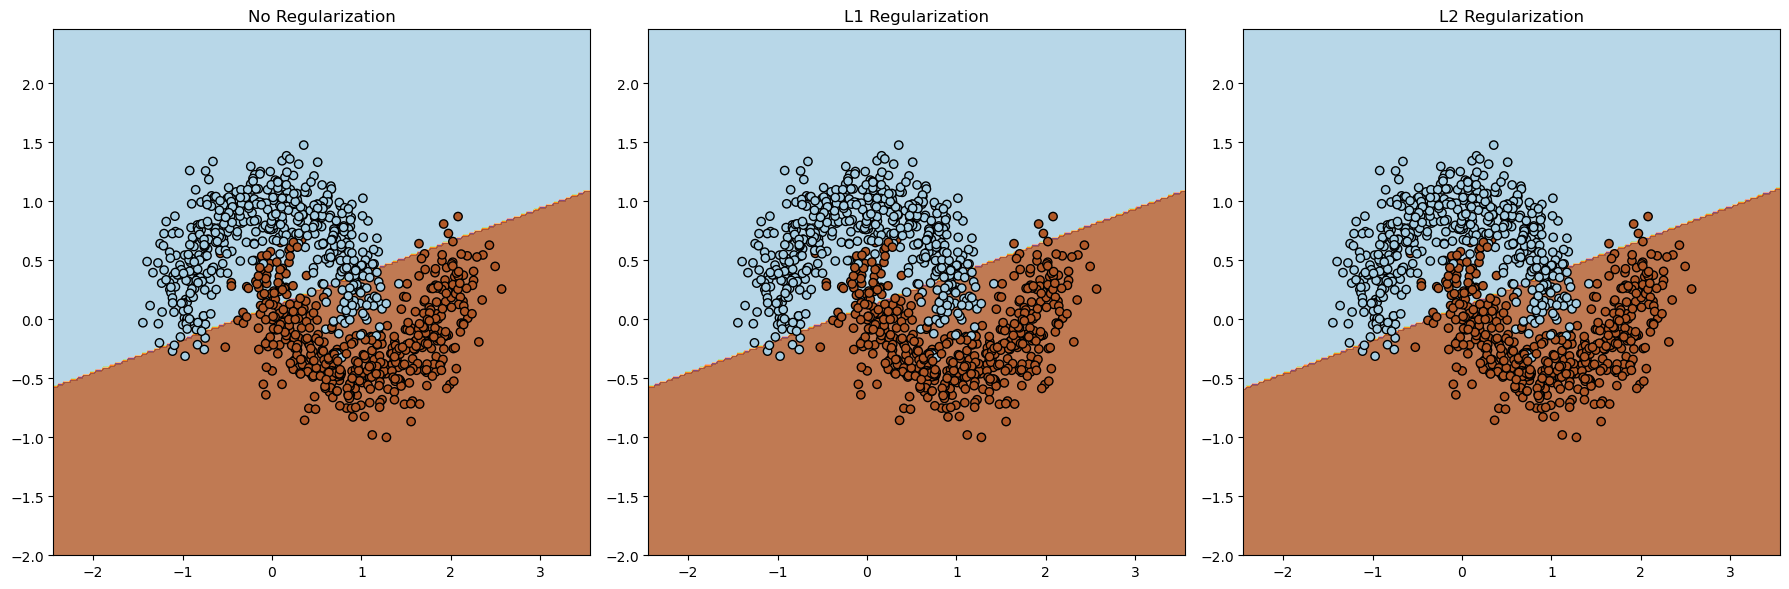

In [43]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot each model's decision boundary using ORIGINAL (unscaled) X, y
plot_decision_boundary_lr(model_no_reg, X, y, "No Regularization", axes[0], scaler=scaler)
plot_decision_boundary_lr(model_l1, X, y, "L1 Regularization", axes[1], scaler=scaler)
plot_decision_boundary_lr(model_l2, X, y, "L2 Regularization", axes[2], scaler=scaler)

plt.tight_layout()
plt.show()